In [3]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [4]:
# a) create a vector with 100 observations from a N(0, 1) distribution (mean 0, variance 1)
x = np.random.randn(100)
print x.shape
print np.var(x)
print np.mean(x)

(100,)
1.2054222843
0.0157901863606


In [5]:
# b) 100 observations from N(0, .25) distribution
eps = math.sqrt(0.25) * np.random.randn(100)
print eps.shape
print np.var(eps)
print np.mean(eps)

(100,)
0.237397856081
-0.053446081964


In [6]:
# c) generate a vector y according to model -1 + 0.5x + e
y = -1 + 0.5*x + eps
print "What is the length of the vector y? %s" % y.shape
print "What are the values of b0 and b1? -1 and 0.5"

What is the length of the vector y? 100
What are the values of b0 and b1? -1 and 0.5


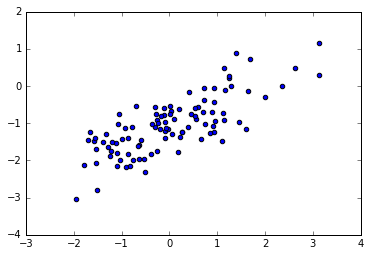

In [7]:
# d) scatterplot of x and y
plt.scatter(x, y)
# Looks like a linear relationship.

(-1.0540091955836051, array([ 0.53566225]))


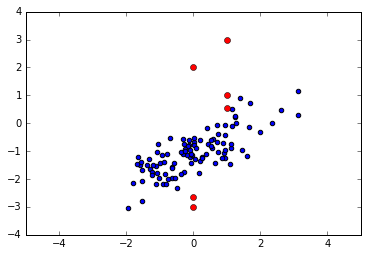

In [8]:
# e) fit a least squares linear model to predict y using x. How do b0 hat and b1 hat compare to b0 and b1?
reg = LinearRegression()
X = pd.DataFrame(x)
reg.fit(X, y)
print (reg.intercept_, reg.coef_)
plt.scatter(x, y)
rng = xrange(-3, 3)
# plt.plot(rng, map(lambda i: reg.predict(i)[0], rng)) # plot({all xs}, {all ys})
plt.xlim(-5, 5)
plt.plot([[-3, reg.predict(-3)[0], 2], [3, reg.predict(3)[0], 1]], 'ro')

(100,)
(100,)


KeyError: 1

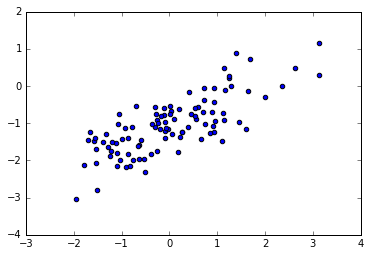

In [19]:
# plots = plt.plot([(x, reg.predict(x)[0]) for x in range(0, 10)], 'ro', alpha=0.5)
print x.shape
print y.shape
plt.scatter(x, y)
plt.plot(points['A'], points['B'])

In [17]:
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     24.14
Date:                Fri, 10 Jun 2016   Prob (F-statistic):           3.55e-06
Time:                        14:35:15   Log-Likelihood:                -156.77
No. Observations:                 100   AIC:                             315.5
Df Residuals:                      99   BIC:                             318.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
0              0.5219      0.106      4.913      0.000         0.311     0.733
==============================================================================
Omnibus:                        1.573   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.257
Skew:                          -0.045   Prob(JB):                        0.533
Kurtosis:                       2.458   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5)

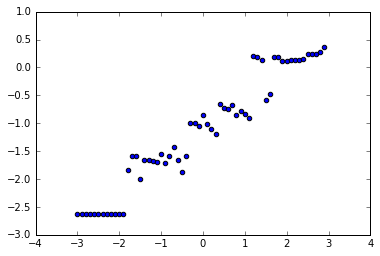

In [16]:
model.fit(X, y)

# Test data
xs = np.arange(-3, 3, 0.1)

# Predicted outcomes using the Random Forest regression
ys = [model.predict(xi) for xi in xs]
plt.scatter(xs, ys)